In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gnact import network

# network tools
import networkx as nx
from cdlib import algorithms
from cdlib import viz
from cdlib import evaluation

## Community Detection Comparison Abstraction

GNACT includes an "analyze_comms" function that wraps several community detection algorithms made available bu the CDLib package.  This function will iterate through the algorithms defined in the algo_dict and apply them against a given network.  If there is a ground truth dataset available, the function will compute the Adjusted Mutual Information score between the algorithm's resulting communities and the ground truth.  AMI is scaled from 0 to 1, with 1 repersenting perfect agreement.

This approach would be most helpful when only a small subset of a broader network has been properly labeled into communitites, or if a similar network has been labeled with communities.  Then, this approach could be used to identify which community detection algorithms work best against the data and can be applied with more confidence against the unlabeled data.

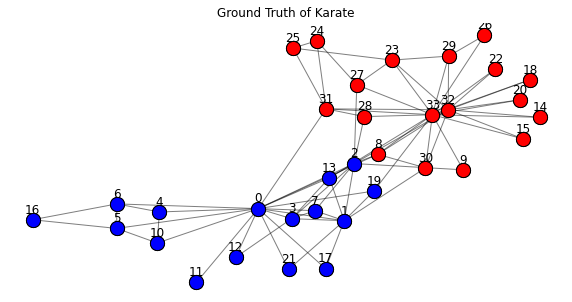

The AMI for louvain algorithm is 0.691.


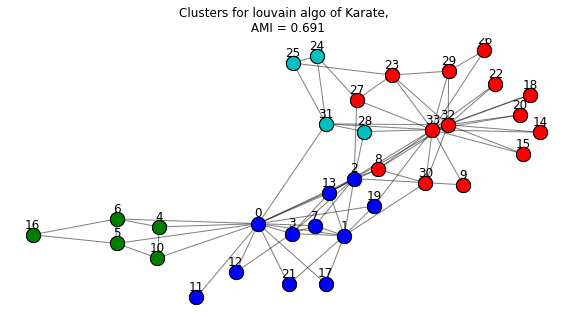

The AMI for leidan algorithm is 0.161.


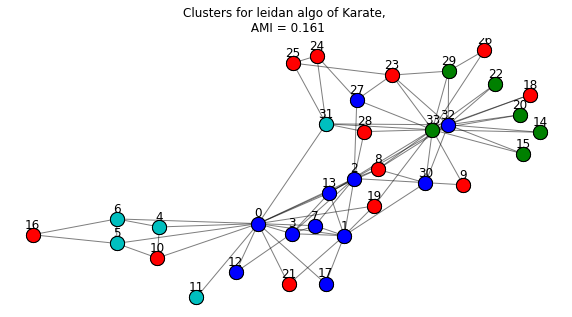

The AMI for greed_modularity algorithm is 0.681.


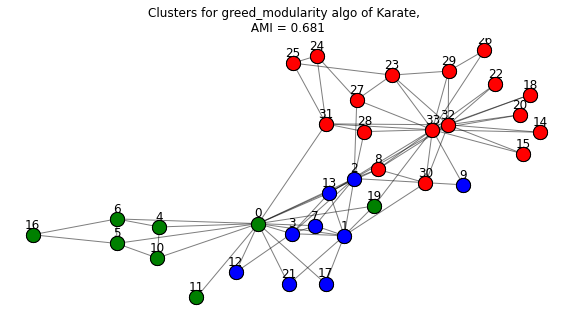

The AMI for label_prop algorithm is 0.152.


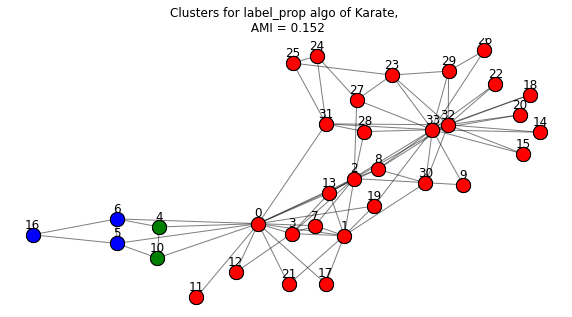

The AMI for walktrap algorithm is 0.069.


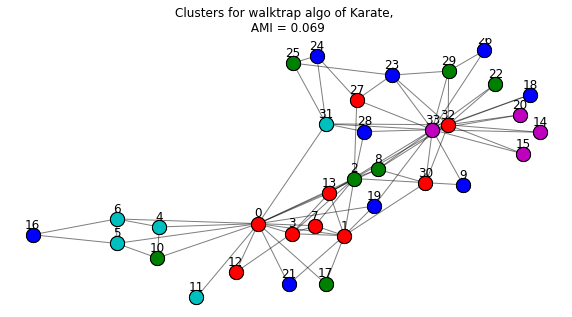

The AMI for infomap algorithm is 0.687.


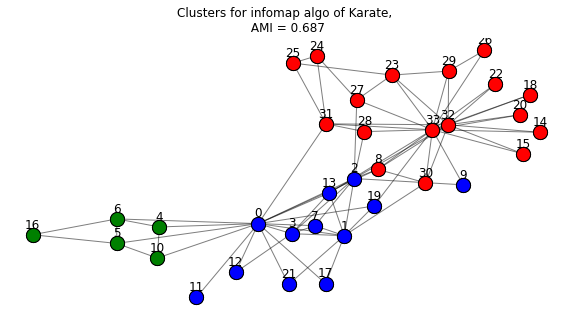

The AMI for eigenvector algorithm is 0.17.


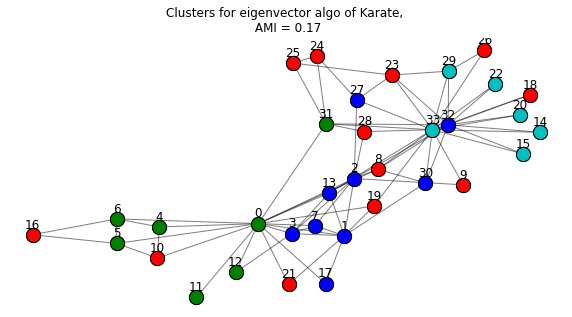

The AMI for spinglass algorithm is 0.161.


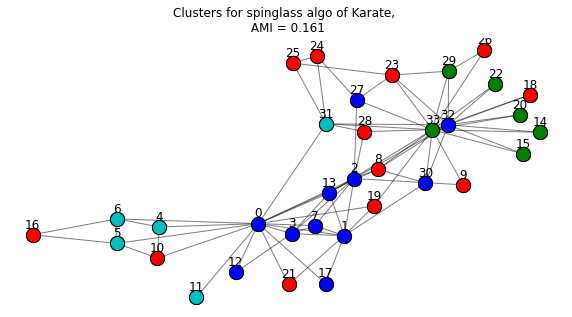

In [10]:
df_edges = pd.read_csv('karate/karate_edges.csv')
df_truth = pd.read_csv('karate/karate_truth.csv')
# define graph name
graph_name = "Karate"

# define algorithms and their names to iterate through
# all of these algorithms do not require additional arguments
algo_dict = {'louvain': algorithms.louvain,
             'leidan': algorithms.leiden,
             'greed_modularity': algorithms.greedy_modularity,
             'label_prop': algorithms.label_propagation,
             'walktrap': algorithms.walktrap,
             'infomap': algorithms.infomap,
             'eigenvector': algorithms.eigenvector,
             'spinglass': algorithms.spinglass}

results_list = network.analyze_comms(df_edges, df_truth, graph_name, algo_dict)

### Rollup of Results
The function also returns a "results_list" which includes a rollup of how each algorithm performed.

In [4]:
df_results = pd.DataFrame.from_dict(results_list).drop('pred_coms', axis=1).set_index('name')
df_results

,AMI,numb_communities,truth_communities
name,,,
louvain,0.691,4,2
leidan,0.161,4,2
greed_modularity,0.681,3,2
label_prop,0.152,3,2
walktrap,0.069,5,2
infomap,0.687,3,2
eigenvector,0.170,4,2
spinglass,0.161,4,2


### Visualizing Different Charachteristics of the resulting Communities

CDLib's evaluate module allows the resulting communities to be compared across a borad range of charachteristics.  More details are found at this link (https://cdlib.readthedocs.io/en/latest/reference/evaluation.html) but several examples are given below.  This can allow a data scientist to see how well the different clustering methods compare.

In [11]:
# use a list comprehension to get each of the pred_coms NodeClustering object from the results list
pred_coms_list = [results_dict['pred_coms'] for results_dict in results_list]


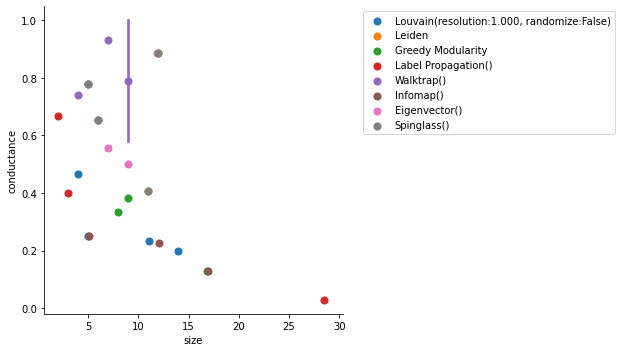

In [12]:
viz.plot_com_properties_relation(pred_coms_list, evaluation.size,
                                 evaluation.conductance)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

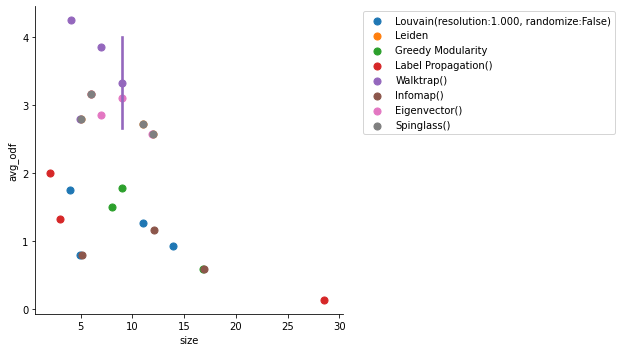

In [15]:
viz.plot_com_properties_relation(pred_coms_list, evaluation.size,
                                 evaluation.avg_odf)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Second Example: AIS Port Data

In this second, more complex example, we will use the network from the AIS data generated as ships travel (edges) between different ports (nodes).  In this case, the ground truth is the region the port belongs in.  the four regions are "West Coast", "Great Lakes", "East Coast", and "Gulf of Mexico / Carribean".  This is a much denser dataset with 4086 edges and about 300 nodes.

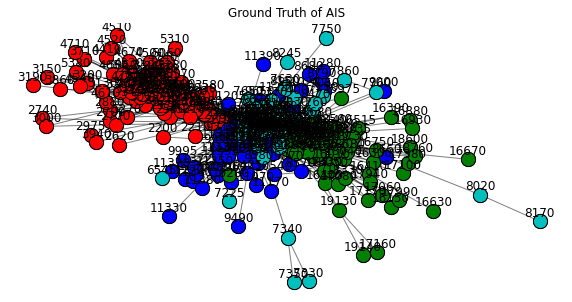

The AMI for louvain algorithm is 0.731.


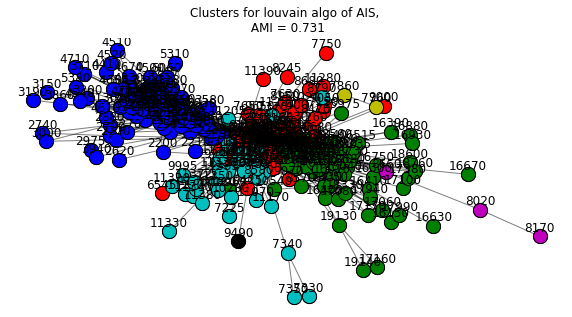

The AMI for leidan algorithm is 0.741.


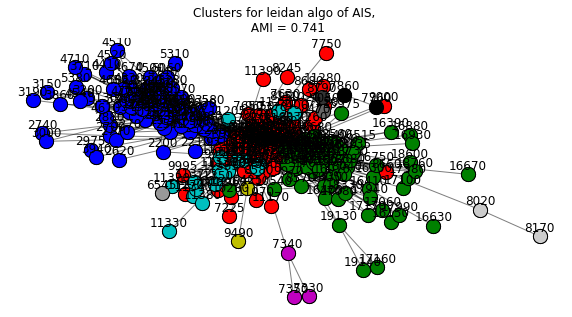

The AMI for greed_modularity algorithm is 0.682.


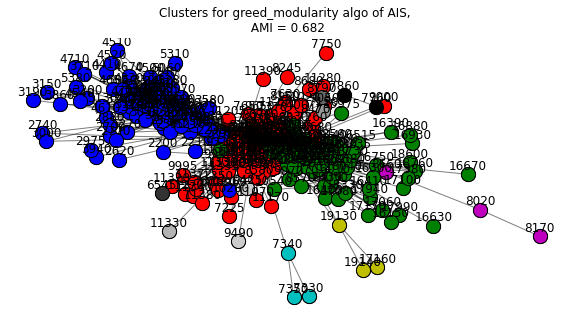

The AMI for label_prop algorithm is 0.499.


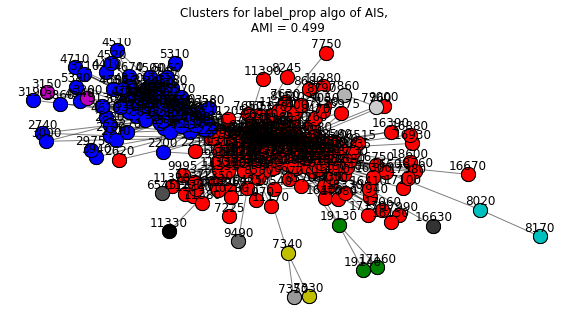

The AMI for walktrap algorithm is 0.62.


In [ ]:
# load the edges with only the source and target id columns
df_edges = pd.read_csv('ais/ais_edgelist_for_cd.csv')
df_edges = df_edges[['Source_id','Target_id']]

# load the truth df with just the node id and the true commuitites.  rename columns
df_truth = pd.read_csv('ais/sites_with_regions.csv')
df_truth = df_truth[['port_id', 'region']].dropna()
df_truth.columns = ['node','truth']

# define graph name, 
graph_name = "AIS"

# define algorithms and their names to iterate through
# all of these algorithms do not require additional arguments
algo_dict = {'louvain': algorithms.louvain,
             'leidan': algorithms.leiden,
             'greed_modularity': algorithms.greedy_modularity,
             'label_prop': algorithms.label_propagation,
             'walktrap': algorithms.walktrap,
             'infomap': algorithms.infomap,
             'eigenvector': algorithms.eigenvector,
             'spinglass': algorithms.spinglass}

results_list = network.analyze_comms(df_edges, df_truth, graph_name, algo_dict)

In [ ]:
df_results = pd.DataFrame.from_dict(results_list).drop('pred_coms', axis=1).set_index('name')
df_results

In [ ]:
# use a list comprehension to get each of the pred_coms NodeClustering object from the results list
pred_coms_list = [results_dict['pred_coms'] for results_dict in results_list]

viz.plot_com_properties_relation(pred_coms_list, evaluation.size,
                                 evaluation.conductance)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()